# Module 2: Data wrangling using `pandas`

## Overview: USGS core dataset
This notebook will take you through python code very commonly used to import, sort, and visualize some data, in this case a spreadsheet of USGS core data. We will use `pandas`, a fast, powerful, flexible, and easy-to-use data analysis and manipulation tool. 

By completing this notebook, you will be able to:
- See how easy it is to interact with a large dataset that would be cumbersome to handle in Excel. 
- Slice, group, and combine data and perform basic data exploration and visualization

For questions on this notebook, ask them on the [GEOL 557 slack](https://join.slack.com/t/minesgeo/shared_invite/zt-cqawm4lu-Zcfpf4mBLwjnksY6_umlKA)<a href="https://join.slack.com/t/minesgeo/shared_invite/zt-cqawm4lu-Zcfpf4mBLwjnksY6_umlKA">
<img src="https://cdn.brandfolder.io/5H442O3W/as/pl546j-7le8zk-ex8w65/Slack_RGB.svg" alt="Go to the GEOl 557 slack" width="100">
</a>

## Instructions
Work through this notebook - there will be several places where you need to fill-in-the-blank or write some code into an open cell. When you are finished, make sure to use the Colab menu (not the browser-level menu) to do the following:
- Expand all the sections - in the Colab menu, choose View --> Expand sections) 
- Save the notebook as a pdf, again using the Colab menu, using File --> Print --> Save as PDF. 

--- 
## Course
**GEOL 557 Earth Resource Data Science I: Fundamentals**. GEOL 557 forms part 2 of the four-part course series for the "Earth Resource Data Science" online graduate certificate at Mines - [learn more about the certificate here](https://online.mines.edu/er/)

Notebook created by **Zane Jobe** and **Thomas Martin**, [CoRE research group](https://core.mines.edu), Colorado School of Mines

[![Twitter URL](https://img.shields.io/twitter/url/https/twitter.com/ZaneJobe.svg?style=social&label=Follow%20%40ZaneJobe)](https://twitter.com/ZaneJobe)
and [![Twitter URL](https://img.shields.io/twitter/url/https/twitter.com/ThomasM_geo.svg?style=social&label=Follow%20%40ThomasM_geo)](https://twitter.com/ThomasM_geo) on Twitter 


### First, let's import some libraries

In [1]:
# these three libraries are very, very, common and you will probably import them almost any time you do anything
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# this sets the notebook width to make use of more screen on a widescreen laptop
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

/tmp/ipykernel_540/3764414258.py:8: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


## Import some data
We will use a csv file that has lists all the cores in the USGS Core Research Center in Lakewood, CO. I just downloaded it directly from the website and made no changes to it. That's the whole point of all this, which is to work with data you can easily obtain and not spend time manually changing things in Excel. 

You don't need to do this, but if you want to recreate this dataset, you can download this exact spreadsheet from the [USGS CRC](https://my.usgs.gov/crcwc/). Just click search, don't type anything into the boxes. You should get 16,531 rows (as of Feb 2020), which you can export as a CSV at the bottom of the page. You could do the same things for cuttings by clicking on the cuttings tab (there are 53,456 rows in the cuttings database), but we will just stick with cores for now - 16,000 rows is plenty of data for our first foray into python!

If the code to import the data does not work, you can go to [this csv](https://docs.google.com/spreadsheets/d/1fX8ZyF2Pmx7apcBftvWVVOUlPTCRl014cIASIowAVNE/edit?usp=sharing) in Google Drive - open it in Google Sheets, and then click 'Share' in the upper right hand corner. Copy the link, and then paste it below, replacing the `view?usp=sharing` with `export?format=csv`.

BTW - if instead you go to the file straight in Google Drive, and copy the link from there rather than inside of Google Sheets, you need to do the import a slightly different way (described in this [stackoverflow post](https://stackoverflow.com/questions/56611698/pandas-how-to-read-csv-file-from-google-drive-public)). Why it is different in Sheets vs, Drive, I do not know...

In [2]:
# import data using pandas

# these next two things shuoldnt need to be changed if you set up your Google Drive folder correctly (see Module 1)
folder_path = '../1_data/' # makes a path
file_name = 'USGS_cores_all.csv' # file name

df=pd.read_csv(folder_path + file_name) # uses pandas to read in the csv as a 'DataFrame' called df

df.head(2) # show the first two lines

,Twn Num,Twn Dir,Rng Num,Rng Dir,Sec,Quarter,Lib Num,API Num,Operator,Well Name,...,Thin Sec,Analysis,Latitude,Longitude,Source,Security Flag,Formation,Age,Min Depth,Max Depth
0,21.0,S,8.0,E,17.0,SWSW,T645,4.301530e+09,WOLF ENERGY,1-17 ANDOVER FED,...,F,F,38.985290,-111.053300,FROM STATE RECORDS,NO SPECIAL RESTRICTIONS,KAIBAB /LM/,PERM,5147.0,5207.0
1,157.0,N,91.0,W,7.0,SWNW,T646,3.306100e+09,GARY SAMUEL JR,7-5 JOHNSON,...,F,T,48.439313,-102.492039,FROM STATE RECORDS,NO SPECIAL RESTRICTIONS,RIVAL,MISS,8047.0,8108.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16531 entries, 0 to 16530
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Twn Num        16219 non-null  float64
 1   Twn Dir        16176 non-null  object 
 2   Rng Num        16218 non-null  float64
 3   Rng Dir        16175 non-null  object 
 4   Sec            16212 non-null  float64
 5   Quarter        14145 non-null  object 
 6   Lib Num        16531 non-null  object 
 7   API Num        13102 non-null  float64
 8   Operator       16527 non-null  object 
 9   Well Name      16529 non-null  object 
 10  Field          14571 non-null  object 
 11  Type           16072 non-null  object 
 12  State          16451 non-null  object 
 13  County         16530 non-null  object 
 14  Photos         16531 non-null  object 
 15  Thin Sec       16531 non-null  object 
 16  Analysis       16531 non-null  object 
 17  Latitude       16374 non-null  float64
 18  Longit

### Now let's create a thickness value from the Depth columns to see how thick each core sample is:


In [4]:
th=df['Max Depth']-df['Min Depth'] # make the variable
df['thickness']=th # assign it to a new column in dataframe called thickness

In [5]:
df.thickness.describe()

count    16485.000000
mean       126.122354
std        523.089766
min      -6152.000000
25%         20.000000
50%         41.000000
75%         65.000000
max      16253.000000
Name: thickness, dtype: float64

A median of 41 feet seems ok, but the mean is 126, so the distribution is extremely log-normal. Notice the max and min are obviously errors in the database. We won't worry about that for now, as we want to check out the bulk statistics of the database. But good to know there may be a few weird values that you would want to filter out. 

Also, note that there are a few thickness values missing, as the dataframe is 16531 rows and the thickness only has 16485 rows (meaning some rows don't have depth values).

### Let's look at a CDF to see the thickness values
Either there are a lot of really thick cores here, or the depth values are wrong...

We will use a library called seaborn (`sns`), which we will leanr a lot more about later, but just appreciate this CDF for now:

<Axes: xlabel='thickness', ylabel='Density'>

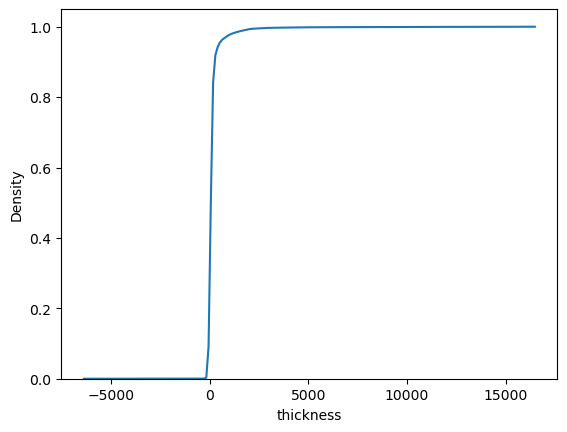

In [6]:
sns.kdeplot(df.thickness,cumulative=True)

Whoa, ok something is definitely weird with those values - there are a few negative ones, and there are some HUGE ones. Let's filter the data a bit:

In [7]:
original_length = len(df)

df = df[df.thickness>0]            # get rid of negative values
df = df[df.thickness<1000]         # get rid of huge values

dropped = original_length - len(df)

print(str(dropped)+' values dropped out of '+str(original_length)+' values')

563 values dropped out of 16531 values


### take one well name and export the data as a csv

In [8]:
one_well=df.loc[df['Well Name']=='1 WILLIAMS'] # choose a well name called "1 WILLIAMS" (case sensitive)
one_well.to_csv('one_well_export.csv') # export just that one well

## Now let's subset the dataframe to look at only Colorado and Wyoming cores

In [9]:
cowy=df[df['State'].isin(['CO','WY'])] # it's as easy at that!! 

# Now let's view the numer of cores grouped by Formation and State
tmp=cowy.groupby(['Formation','State']).size()
tmp=tmp.sort_values(ascending=False) # sort the values in descending order (i.e., with the largest values at the top)
print(tmp[0:50]) # only show the top 50 values

Formation      State
MINNELUSA      WY       506
PHOSPHORIA     WY       451
MUDDY          WY       444
DAKOTA         WY       436
FRONTIER       WY       394
TENSLEEP       WY       349
UNKNOWN        WY       305
DAKOTA J       CO       302
UNKNOWN        CO       295
GREEN RIVER    CO       259
TEAPOT         WY       199
ALMOND         WY       195
MESAVERDE      WY       175
DAKOTA D       CO       159
PARKMAN        WY       144
DAKOTA         CO       126
SHANNON        WY       112
GREEN RIVER    WY       109
NIOBRARA       CO       104
MESAVERDE      CO       103
SUSSEX         CO       102
FORT UNION     WY       101
LEWIS          WY        97
MOWRY          WY        84
WASATCH        WY        80
WALL CREEK     WY        69
OPECHE         WY        66
FRUITLAND      CO        62
MADISON        WY        60
WILLIAMS FORK  CO        58
LANCE          WY        55
MANCOS         CO        55
SKULL CREEK    WY        53
LYONS          CO        51
SUSSEX         WY        51

### Now you try a groupby of some of the other columns:
Maybe By `Age` and `Formation`? Or `State` and `County`? Choose any of the column names, but consider whether they are useful for grouping. For example, depth probably isn't useful here, as each core will have a slightly different depth values, so you would end up with thoussands of groups. 

In [10]:
# your code here

### Now let's subset a little more to look at one formation only

In [11]:
Fm_of_interest=cowy.loc[cowy['Formation']=='GREEN RIVER'] # pull only one formation
print('there are',len(Fm_of_interest),'green river cores')

slab=Fm_of_interest[Fm_of_interest['Type'].isin(['SLABBED'])] # find only slabbed cores (i.e., not whole core or butts)
print('there are',len(Fm_of_interest),'slabbed green river cores') 

there are 368 green river cores
there are 368 slabbed green river cores


### And filter the data by one county

In [12]:
countyname='DENVER' # change this name (case sensitive)

c=cowy.loc[cowy['County']==countyname]
print('There are',c.thickness.sum(),'ft of slabbed core in',countyname,'County')
print('There are',c['Well Name'].unique().size,'wells in',countyname,'County')
print('There are',c['Well Name'].size,'slabbed core boxes in',countyname,'County')

There are 109.0 ft of slabbed core in DENVER County
There are 3 wells in DENVER County
There are 3 slabbed core boxes in DENVER County


### plot formations with most rows of data
We will use seaborn again here, which plays very well with pandas

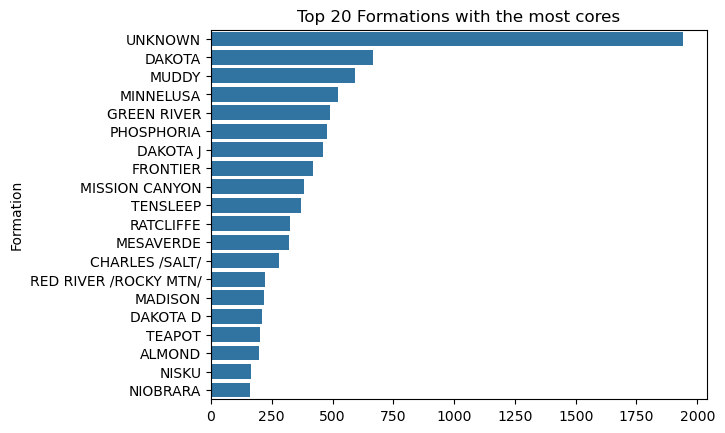

In [13]:
counts=df['Formation'].value_counts()
sns.barplot(y=counts.index[0:20], x=counts.values[0:20])
plt.title('Top 20 Formations with the most cores')
plt.show()

### find total thickness of Lewis cores in Wyoming

In [14]:
wy=df[df['State'].isin(['WY'])]
lewis=wy[wy['Formation'].isin(['LEWIS'])].sort_values(by='thickness',ascending=False)
lewis.thickness.sum()

4678.0

### Now you try 

Do a groupby of some of the other columns, maybe By `Age` and `Formation`? Or `State` and `County`? Choose any of the column names, but consider whether they are useful for grouping. For example, depth probably isn't useful here, as each core will have a slightly different depth values, so you would end up with thousands of groups. 

You can use the `cowy` variable or make a new one with a different state...

Finally, export what you did as a csv.

In [15]:
# your code here

![Done](https://media1.tenor.com/images/2482cef47746e746a0b8c7e1af3b0e6e/tenor.gif?itemid=7907909)